In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from yahoofinancials import YahooFinancials
%matplotlib inline

In [12]:
appl_df = yf.download('AAPL', 
                      start='2019-01-01', 
                      end='2019-12-31', 
                      progress=False)
appl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.505024,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.669640,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,36.149662,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,36.069202,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.756794,164101200


<AxesSubplot:title={'center':'Apples stock price'}, xlabel='Date'>

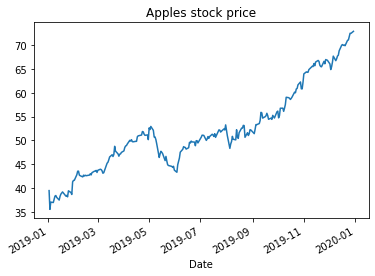

In [9]:
appl_df['Close'].plot(title="Apple's stock price")

In [13]:
sc = MinMaxScaler(feature_range = (0, 1))

In [22]:
def preproc( data, lag, ratio):
    data=data.dropna().iloc[:, 0:2]
    Dates=data.index.unique()
    data.iloc[:, 1] = sc.fit_transform(data.iloc[:, 1].values.reshape(-1, 1))
    for s in range(1, lag):
        data['shift_{}'.format(s)] = data['Open'].shift(s)
    X_data = data.dropna().drop(['Open'], axis=1)
    y_data = data.dropna()[['Open']]
    index=int(round(len(X_data)*ratio))
    X_data_train=X_data.iloc[:index,:]
    X_data_test =X_data.iloc[index+1:,:]
    y_data_train=y_data.iloc[:index,:]
    y_data_test =y_data.iloc[index+1:,:]
    return X_data_train,X_data_test,y_data_train,y_data_test,Dates;

In [23]:
a,b,c,d,e=preproc(appl_df, 15, 0.75)

In [30]:
tsla_df = yf.download('TSLA', 
                      start='2019-01-01', 
                      end='2019-12-31', 
                      progress=False)
tsla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,61.220001,63.026001,59.759998,62.023998,62.023998,58293000
2019-01-03,61.400002,61.880001,59.476002,60.071999,60.071999,34826000
2019-01-04,61.200001,63.599998,60.546001,63.537998,63.537998,36970500
2019-01-07,64.344002,67.348000,63.549999,66.991997,66.991997,37756000
2019-01-08,68.391998,68.802002,65.403999,67.070000,67.070000,35042500


In [32]:
def preproc2( data1, data2, lag, ratio):
    common_dates=list(set(data1.index) & set(data2.index))
    data1=data1[data1.index.isin(common_dates)]
    data2=data2[data2.index.isin(common_dates)]
    X1=preproc(data1, lag, ratio)
    X2=preproc(data2, lag, ratio)
    return X1,X2;

In [33]:
dataLSTM=preproc2( tsla_df, appl_df, 15, 0.75)

In [34]:
dataLSTM[1][3]

,Open
Date,
2019-10-08,56.455002
2019-10-09,56.757500
2019-10-10,56.982498
2019-10-11,58.237499
2019-10-14,58.724998
2019-10-15,59.097500
2019-10-16,58.342499
2019-10-17,58.772499
2019-10-18,58.647499


In [36]:
dataLSTM[0][3]

,Open
Date,
2019-10-08,47.174000
2019-10-09,48.264000
2019-10-10,49.056000
2019-10-11,49.430000
2019-10-14,49.580002
2019-10-15,51.540001
2019-10-16,51.478001
2019-10-17,52.500000
2019-10-18,52.139999
